In [ ]:
import tensorflow as tf
import glob
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import PIL
import imageio

from tensorflow.keras import layers
from IPython import display
from PIL import Image

In [ ]:
!wget https://perso.esiee.fr/~gueurett/van_gogh.zip
!unzip van_gogh.zip

In [ ]:
path = 'van_gogh/*'
data = glob.glob(path)
resize_dim = (200,200)
size = len(data)
tenth = int(size/10)

dataset = np.zeros((size, resize_dim[0], resize_dim[1], 3))

for index, image in enumerate(data):
  im=np.array(Image.open(image).resize(resize_dim)) / 255
  if index % tenth == 0: print(str((index // tenth)*10) + "% ", end="")
  dataset[index] = im

print('\n')
print("dataset shape: ", dataset.shape)

0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% 

dataset shape:  (678, 200, 200, 3)


In [ ]:
print(dataset[0].shape)

(200, 200, 3)


In [ ]:
for i in range(678):
  print(np.mean(dataset[i]))

0.3120708496732026
0.2730156209150327
0.42563895424836595
0.5364277777777778
0.37547758169934636
0.26234303921568625
0.2153991503267974
0.6066466013071896
0.3535773529411764
0.40704382352941176
0.44628166666666663
0.4251677124183007
0.32601450980392155
0.37947035947712415
0.4056390849673203
0.44147058823529417
0.32914310457516344
0.451697679738562
0.3123370588235294
0.5146065359477124
0.5107578104575162
0.47779535947712426
0.36832081699346403
0.40629137254901954
0.32685330065359475
0.3201795751633987
0.41116084967320266
0.4146611111111112
0.3529351960784314
0.5792330065359478
0.35913333333333336
0.49264718954248354
0.366894183006536
0.44484696078431357
0.37956846405228767
0.4749857189542484
0.4692028758169934
0.41899199346405236
0.5172420588235294
0.374836797385621
0.40335764705882354
0.48260215686274516
0.3984955882352942
0.6037075490196078
0.22529833333333332
0.28329218954248364
0.5206541176470588
0.492484477124183
0.5390005882352942
0.43187761437908495
0.49906555555555565
0.22509941

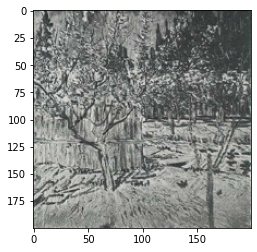

In [ ]:
plt.imshow(dataset[677]);

In [ ]:
print(dataset[677])

[[[0.56470588 0.58039216 0.57647059]
  [0.62352941 0.63921569 0.63529412]
  [0.58039216 0.59607843 0.59215686]
  ...
  [0.21960784 0.2627451  0.24705882]
  [0.23529412 0.27843137 0.26666667]
  [0.20784314 0.25098039 0.22352941]]

 [[0.54901961 0.56470588 0.56078431]
  [0.61176471 0.62745098 0.62352941]
  [0.49019608 0.50588235 0.50196078]
  ...
  [0.23137255 0.2745098  0.25882353]
  [0.23921569 0.28235294 0.26666667]
  [0.22352941 0.26666667 0.23921569]]

 [[0.57647059 0.59215686 0.58823529]
  [0.62745098 0.64313725 0.63921569]
  [0.4745098  0.49019608 0.48627451]
  ...
  [0.20392157 0.24705882 0.23137255]
  [0.24313725 0.28627451 0.27058824]
  [0.21960784 0.2627451  0.23529412]]

 ...

 [[0.60392157 0.62352941 0.6       ]
  [0.47843137 0.49803922 0.4745098 ]
  [0.54901961 0.56862745 0.54509804]
  ...
  [0.46666667 0.47058824 0.45098039]
  [0.47843137 0.48235294 0.4627451 ]
  [0.6        0.63137255 0.60392157]]

 [[0.58039216 0.6        0.57647059]
  [0.59607843 0.61568627 0.59215686]


In [ ]:
NOISE_SIZE = 200
EPOCHS = 500
BATCH_SIZE = 60
BUFFER_SIZE = 678
num_examples_to_generate = 8

In [ ]:
images_dataset = tf.data.Dataset.from_tensor_slices(dataset).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [ ]:
def make_generator():

  model = tf.keras.Sequential()
  model.add(layers.Dense(25*25*256, use_bias=False, input_shape=(NOISE_SIZE,)))
  model.add(layers.BatchNormalization()) #normalize the input to mean 0 and std 1
  model.add(layers.LeakyReLU())

  model.add(layers.Reshape((25,25,256)))
  assert model.output_shape == (None, 25, 25, 256) # None is the batch size, this tests if the condition is respected, else throws an error

  model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
  assert model.output_shape == (None, 25, 25, 128)
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())

  model.add(layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False))
  assert model.output_shape == (None, 50, 50, 128)
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())

  """
  model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
  assert model.output_shape == (None, 100, 100, 64)
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())
  """

  model.add(layers.Conv2DTranspose(3, (5, 5), strides=(4, 4), padding='same', use_bias=False))
  assert model.output_shape == (None, 200, 200, 3)
  model.add(layers.ReLU())

  return model

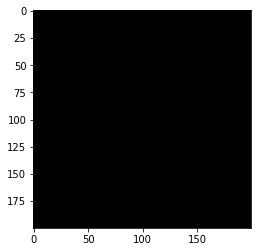

In [ ]:
random_seed = tf.random.uniform(shape=[1, NOISE_SIZE], minval=0, maxval=1)

generator = make_generator()
generated_image = generator(random_seed, training=False)

plt.imshow(generated_image[0, :, :, :])

In [ ]:
print(np.mean(random_seed))

0.48978156


In [ ]:
print(np.mean(generated_image))

0.0007334272


In [ ]:
def make_discriminator():

  model = tf.keras.Sequential()

  model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[200, 200, 3]))
  model.add(layers.LeakyReLU())
  model.add(layers.Dropout(0.3))

  model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
  model.add(layers.LeakyReLU())
  model.add(layers.Dropout(0.3))

  model.add(layers.Flatten())
  model.add(layers.Dense(1))

  return model

In [ ]:
discriminator = make_discriminator()
output_fake = discriminator(generated_image, training=False)

print(output_fake)

tf.Tensor([[0.00023153]], shape=(1, 1), dtype=float32)


In [ ]:
crossentropy = tf.keras.losses.BinaryFocalCrossentropy(from_logits=True)

In [ ]:
def discriminator_loss(output_real, output_fake):

  loss_real = crossentropy(tf.ones_like(output_real), output_real)
  loss_fake = crossentropy(tf.ones_like(output_fake), output_fake)
  total_loss = loss_real + loss_fake
  print("disc_loss = ", total_loss)

  return total_loss

In [ ]:
def generator_loss(output_fake):

  

  loss_fake = crossentropy(tf.ones_like(output_fake), output_fake)
  print("gen_loss = ", loss_fake)

  return loss_fake

In [ ]:
def generate_and_save_images(model, epoch, test_input):
  
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5)
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [ ]:
generator_optimizer     = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [ ]:
nb_examples = 16
random_seed = tf.random.uniform(shape=[nb_examples, NOISE_SIZE], minval=0, maxval=1)

In [ ]:
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, NOISE_SIZE])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [ ]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    #display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             random_seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           random_seed)

gen_loss =  Tensor("binary_focal_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
disc_loss =  Tensor("add:0", shape=(), dtype=float32)
gen_loss =  Tensor("binary_focal_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
disc_loss =  Tensor("add:0", shape=(), dtype=float32)


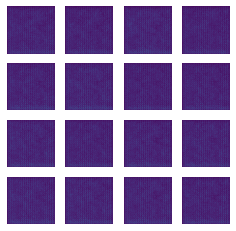

Time for epoch 1 is 8.413566827774048 sec


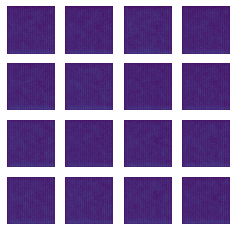

Time for epoch 2 is 6.8147501945495605 sec


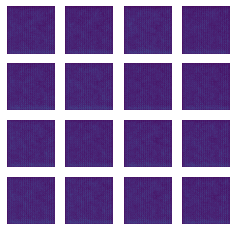

Time for epoch 3 is 6.9016313552856445 sec


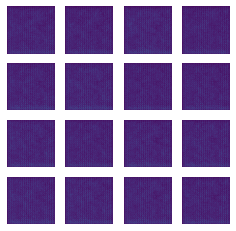

Time for epoch 4 is 7.150586843490601 sec


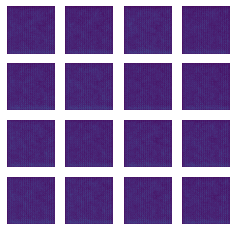

Time for epoch 5 is 6.925421237945557 sec


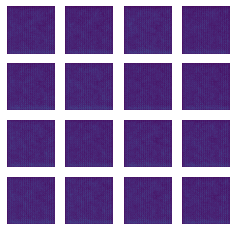

Time for epoch 6 is 6.893992900848389 sec


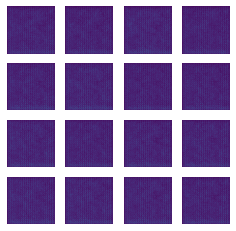

Time for epoch 7 is 6.84173059463501 sec


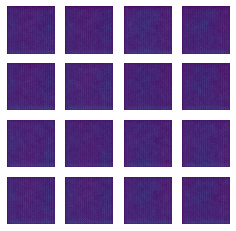

Time for epoch 8 is 6.9995505809783936 sec


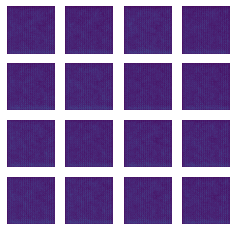

Time for epoch 9 is 6.763656377792358 sec


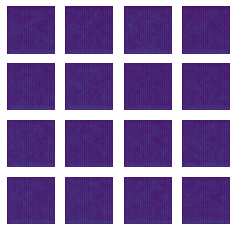

Time for epoch 10 is 6.83879828453064 sec


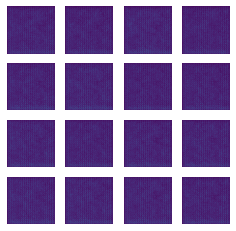

Time for epoch 11 is 7.1209166049957275 sec


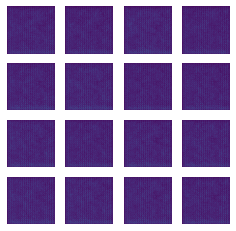

Time for epoch 12 is 6.9367241859436035 sec


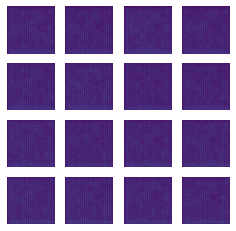

Time for epoch 13 is 6.764737606048584 sec


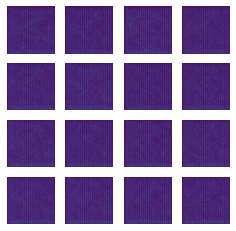

Time for epoch 14 is 6.795719146728516 sec


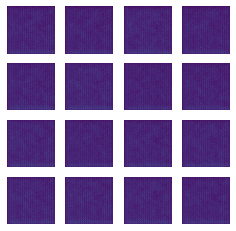

Time for epoch 15 is 7.913971424102783 sec


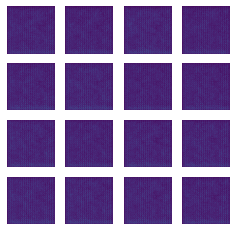

Time for epoch 16 is 7.168037414550781 sec


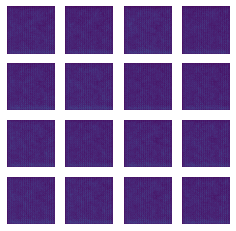

Time for epoch 17 is 6.835541486740112 sec


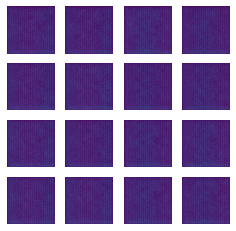

Time for epoch 18 is 6.830429553985596 sec


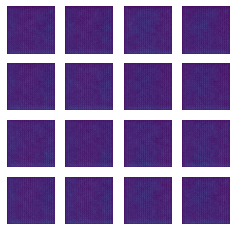

Time for epoch 19 is 6.828307628631592 sec


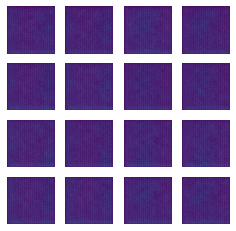

Time for epoch 20 is 7.025160312652588 sec


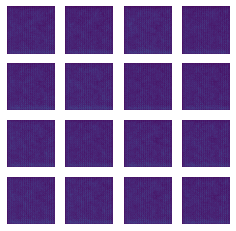

Time for epoch 21 is 6.788836717605591 sec


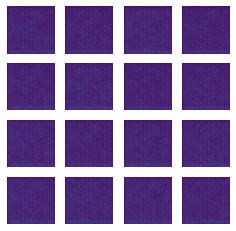

Time for epoch 22 is 6.80299186706543 sec


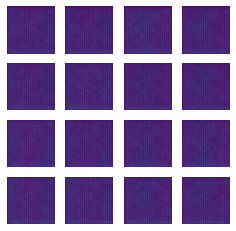

Time for epoch 23 is 6.796116828918457 sec


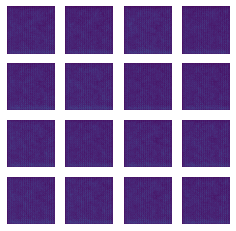

Time for epoch 24 is 6.993097305297852 sec


KeyboardInterrupt: ignored

In [ ]:
train(images_dataset, EPOCHS)

In [ ]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [ ]:
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

In [ ]:
display_image(EPOCHS)

In [ ]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

In [ ]:
!pip install git+https://github.com/tensorflow/docs

In [ ]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)